<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Seminario_ML/blob/main/1_Aprendizaje_Supervisado/3_Regresión_Lineal_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align='center'> Ejercicios prácticos de regresión lineal </h1>

Los datos de la vivienda de California (California Housing) corresponden a unos. datos de juguete sobre algunas viviendas en un vecindario de California. Este conjunto de datos se utiliza bastante para practicar sobre modelos de aprendizaje supervisado y estadística espacial. Aquí el ejercicio principal consiste en ser capaz de predecir o explicar el valor de la vivienda.

In [1]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [2]:
fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [3]:
fetch_california_housing().keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
fetch_california_housing()['data']

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [5]:
fetch_california_housing()['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [6]:
fetch_california_housing()['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
housing = fetch_california_housing()
housing_df = pd.DataFrame(data=housing.data, columns=housing.feature_names)

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [10]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

<AxesSubplot: >

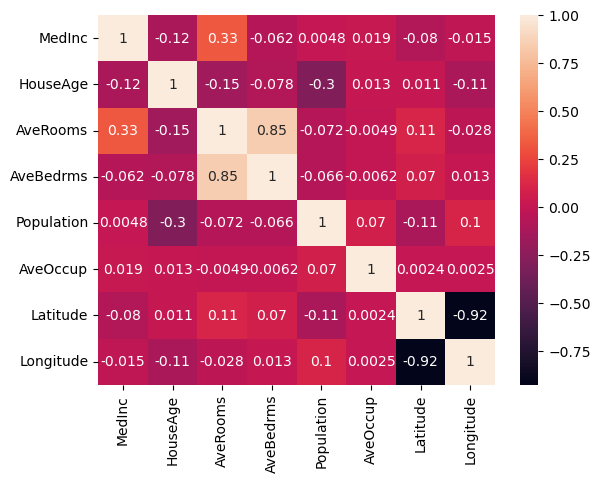

In [14]:
import seaborn as sns

corr_matrix  = housing_df.corr()

sns.heatmap(corr_matrix, annot=True)

In [15]:
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<AxesSubplot: >

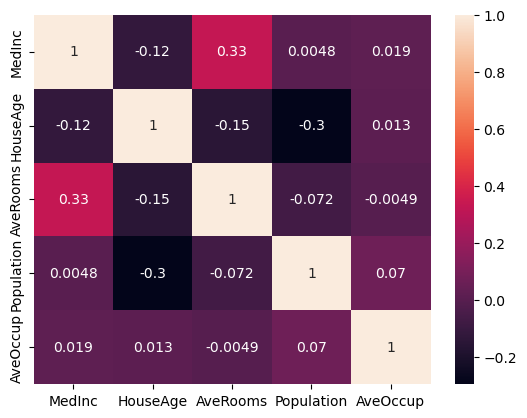

In [16]:
housing_df_drop = housing_df.drop(["AveBedrms", "Latitude", "Longitude"], axis=1)

corr_matrix_drop  = housing_df_drop.corr()

sns.heatmap(corr_matrix_drop, annot=True)

En algunos ejercicios de aprendizaje supervisado, resulta una buena idea reescalar las variables que van a entrar como insumo al modelo. En particular, existen dos maneras bastante utilizadas para hacer esto:

- Reescalador MinMax:

$$MinMax(\mathbf{x}) = \left[\frac{\mathbf{x} - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})} \right]$$

- Reescalador estandarizado:

$$Standard(\mathbf{x}) = \frac{\mathbf{x} - \bar{x}}{s_{x}}$$

donde $\mathbf{\bar{x}}$ y $s_{x}$ son la media y la desviación estandar muestral de $\mathbf{x}$.

Este ejercicio se hace típicamente porque los algoritmos de optimización que utilizan los computadores a veces convergen más rápido cuándo todas las variables se encuentran en una escala en común.

El por qué se utiliza un reescalador u otro depende de la naturaleza de los datos, las características de la máquina de aprendizaje que va a utilizarse y el problema en cuestión.

Para el ejercicio de a continuación, utilizaremos la función `MinMaxScaler()` de `Sklearn`. Para aprender más sobre las herramientas de preprocesamiento disponibles en esta librería, puede visitar https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(housing_df_drop, 
                                                    housing.target, 
                                                    test_size=0.3,
                                                    random_state=13)

In [18]:
print(housing_df_drop.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20640, 5)
(14448, 5)
(6192, 5)
(14448,)
(6192,)


In [31]:
y_train.reshape(-1, 1).shape

(14448, 1)

In [34]:
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

X_train_scaled = x_scaler.fit_transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

y_train_scaled = y_scaler.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = y_scaler.fit_transform(y_test.reshape(-1, 1))

pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4
count,14448.000000,14448.000000,14448.000000,14448.000000,14448.000000
mean,0.231990,0.542569,0.030525,0.040054,0.001952
std,0.131238,0.246838,0.018698,0.032364,0.009963
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.141812,0.333333,0.023517,0.022087,0.001399
50%,0.208625,0.549020,0.029085,0.032766,0.001712
75%,0.292605,0.705882,0.034893,0.048659,0.002082
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
from sklearn.preprocessing import StandardScaler

x_scaler2 = StandardScaler()
y_scaler2 = StandardScaler()

X_train_scaled2 = x_scaler2.fit_transform(X_train)
X_test_scaled2 = x_scaler2.fit_transform(X_test)

y_train_scaled2 = y_scaler2.fit_transform(y_train.reshape(-1, 1))
y_test_scaled2 = y_scaler2.fit_transform(y_test.reshape(-1,1))

#pd.set_option()
pd.DataFrame(X_train_scaled2).describe()

,0,1,2,3,4
count,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04,1.444800e+04
mean,-2.547488e-16,-1.475379e-17,-1.672097e-17,-4.672035e-17,9.835863e-18
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-1.767767e+00,-2.198150e+00,-1.632568e+00,-1.237646e+00,-1.959740e-01
25%,-6.871584e-01,-8.476924e-01,-3.748472e-01,-5.551685e-01,-5.557443e-02
50%,-1.780431e-01,2.613317e-02,-7.704338e-02,-2.251886e-01,-2.414073e-02
75%,4.618851e-01,6.616427e-01,2.336064e-01,2.658838e-01,1.305858e-02
max,5.852251e+00,1.853223e+00,5.184988e+01,2.966180e+01,1.001832e+02


In [20]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [39]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train_scaled, y_train_scaled)

In [47]:
y_train_scaled

array([[0.33690789],
       [0.47092795],
       [0.45670121],
       ...,
       [0.25257834],
       [0.41154676],
       [0.15237257]])

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_train = reg.predict(X_train_scaled)

mse_train = mean_squared_error(y_train_scaled, y_pred_train)
mae_train = mean_absolute_error(y_train_scaled, y_pred_train)

print(mse_train)
print(mae_train)

0.027469936765004904
0.12328056319527705


In [49]:
y_pred = reg.predict(X_test_scaled)

mse = mean_squared_error(y_test_scaled, y_pred)
mae = mean_absolute_error(y_test_scaled, y_pred)

print(mse)
print(mae)

0.027553401338492097
0.12403035640719373


In [50]:
reg.coef_

array([[ 1.31585463,  0.18416017, -0.61985382,  0.19296432, -1.04172043]])

In [51]:
reg.intercept_

array([0.00335505])

In [52]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [53]:
y_pred

array([[0.36510993],
       [0.31241464],
       [0.27464704],
       ...,
       [0.49550809],
       [0.57466742],
       [0.29326621]])

In [54]:
y_scaler.inverse_transform(y_pred)

array([[1.92078048],
       [1.66520727],
       [1.48203363],
       ...,
       [2.55321413],
       [2.9371385 ],
       [1.57233698]])

In [56]:
x_scaler.inverse_transform(X_test_scaled)[0]

array([  4.1528    ,  15.        ,   6.19327731, 768.        ,
         3.22689076])

(array([ 245., 1083., 1253., 1164.,  813.,  501.,  363.,  243.,  155.,
         372.]),
 array([0.14999 , 0.634992, 1.119994, 1.604996, 2.089998, 2.575   ,
        3.060002, 3.545004, 4.030006, 4.515008, 5.00001 ]),
 <BarContainer object of 10 artists>)

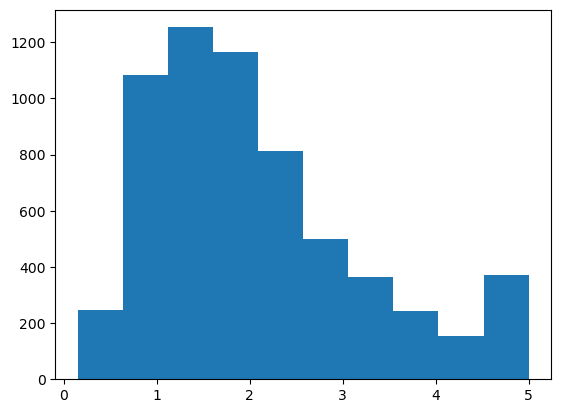

In [25]:
import matplotlib.pyplot as plt

plt.hist(y_test)

In [27]:
pd.Series(y_test).describe()

count    6192.000000
mean        2.071566
std         1.157301
min         0.149990
25%         1.199750
50%         1.792000
75%         2.647000
max         5.000010
dtype: float64

<h2> Diabetes </h2>

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split

In [60]:
load_diabetes()['data']

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [61]:
load_diabetes()['target']

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [64]:
diabetes = load_diabetes(as_frame=True)

In [13]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [66]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [67]:
X = diabetes_df.to_numpy()
y = diabetes.target

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

In [70]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(442, 10)
(353, 10)
(89, 10)
(353,)
(89,)


<AxesSubplot: >

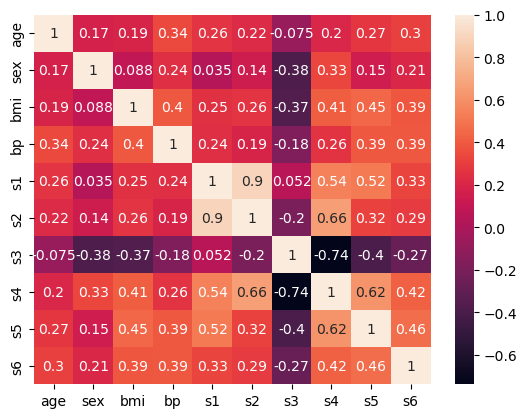

In [18]:
corr_matrix  = diabetes_df.corr()

sns.heatmap(corr_matrix, annot=True)

In [71]:
# Defining models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(random_state=42, max_iter=10000),
    "Ridge": Ridge(random_state=42)
}

In [72]:
models

{'Linear Regression': LinearRegression(),
 'Lasso': Lasso(max_iter=10000, random_state=42),
 'Ridge': Ridge(random_state=42)}

In [104]:
alphas = np.logspace(-10, 2, 50)

In [105]:
alphas

array([1.00000000e-10, 1.75751062e-10, 3.08884360e-10, 5.42867544e-10,
       9.54095476e-10, 1.67683294e-09, 2.94705170e-09, 5.17947468e-09,
       9.10298178e-09, 1.59985872e-08, 2.81176870e-08, 4.94171336e-08,
       8.68511374e-08, 1.52641797e-07, 2.68269580e-07, 4.71486636e-07,
       8.28642773e-07, 1.45634848e-06, 2.55954792e-06, 4.49843267e-06,
       7.90604321e-06, 1.38949549e-05, 2.44205309e-05, 4.29193426e-05,
       7.54312006e-05, 1.32571137e-04, 2.32995181e-04, 4.09491506e-04,
       7.19685673e-04, 1.26485522e-03, 2.22299648e-03, 3.90693994e-03,
       6.86648845e-03, 1.20679264e-02, 2.12095089e-02, 3.72759372e-02,
       6.55128557e-02, 1.15139540e-01, 2.02358965e-01, 3.55648031e-01,
       6.25055193e-01, 1.09854114e+00, 1.93069773e+00, 3.39322177e+00,
       5.96362332e+00, 1.04811313e+01, 1.84206997e+01, 3.23745754e+01,
       5.68986603e+01, 1.00000000e+02])

In [106]:
len(alphas)

50

In [107]:
lasso_tuned_parameters = [{"alpha": alphas}]
ridge_tuned_parameters = [{"alpha": alphas}]

In [108]:
lasso_tuned_parameters

[{'alpha': array([1.00000000e-10, 1.75751062e-10, 3.08884360e-10, 5.42867544e-10,
         9.54095476e-10, 1.67683294e-09, 2.94705170e-09, 5.17947468e-09,
         9.10298178e-09, 1.59985872e-08, 2.81176870e-08, 4.94171336e-08,
         8.68511374e-08, 1.52641797e-07, 2.68269580e-07, 4.71486636e-07,
         8.28642773e-07, 1.45634848e-06, 2.55954792e-06, 4.49843267e-06,
         7.90604321e-06, 1.38949549e-05, 2.44205309e-05, 4.29193426e-05,
         7.54312006e-05, 1.32571137e-04, 2.32995181e-04, 4.09491506e-04,
         7.19685673e-04, 1.26485522e-03, 2.22299648e-03, 3.90693994e-03,
         6.86648845e-03, 1.20679264e-02, 2.12095089e-02, 3.72759372e-02,
         6.55128557e-02, 1.15139540e-01, 2.02358965e-01, 3.55648031e-01,
         6.25055193e-01, 1.09854114e+00, 1.93069773e+00, 3.39322177e+00,
         5.96362332e+00, 1.04811313e+01, 1.84206997e+01, 3.23745754e+01,
         5.68986603e+01, 1.00000000e+02])}]

In [109]:
lasso_clf = GridSearchCV(models["Lasso"], lasso_tuned_parameters, cv=5, refit=True)
ridge_clf = GridSearchCV(models["Ridge"], ridge_tuned_parameters, cv=5, refit=True)

In [110]:
models

{'Linear Regression': LinearRegression(),
 'Lasso': Lasso(max_iter=10000, random_state=42),
 'Ridge': Ridge(random_state=42)}

In [111]:
models.items()

dict_items([('Linear Regression', LinearRegression()), ('Lasso', Lasso(max_iter=10000, random_state=42)), ('Ridge', Ridge(random_state=42))])

In [112]:
mae_test_results = {}
mae_train_results = {}
best_alphas = {}

for name, clf in models.items():
    if name == "Lasso":
        clf = lasso_clf
    elif name == "Ridge":
        clf = ridge_clf

    clf.fit(X_train, y_train)
    
    
    if name != 'Linear Regression':
        best_estimator = clf.best_params_
        print(name, best_estimator)
        best_alphas[name] = best_estimator
        y_pred = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        
    else:
        y_pred = clf.predict(X_test)
        y_pred_train = clf.predict(X_train)
        
    mae_test = mean_absolute_error(y_test, y_pred)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    mae_test_results[name] = mae_test
    mae_train_results[name] = mae_train

Lasso {'alpha': 0.06551285568595495}
Ridge {'alpha': 0.11513953993264481}


In [113]:
mae_train_results

{'Linear Regression': 43.483503523980396,
 'Lasso': 43.99130592282162,
 'Ridge': 43.98334027584566}

In [114]:
mae_test_results

{'Linear Regression': 42.794094679599944,
 'Lasso': 42.773671879162386,
 'Ridge': 43.02491996574353}

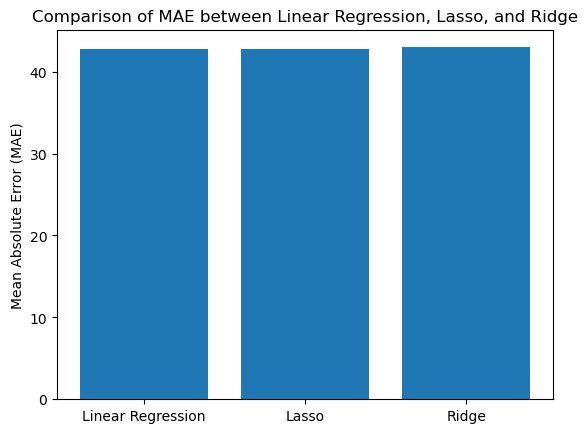

In [115]:
# Plotting comparison
plt.bar(mae_results.keys(), mae_results.values())
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of MAE between Linear Regression, Lasso, and Ridge')
plt.show()

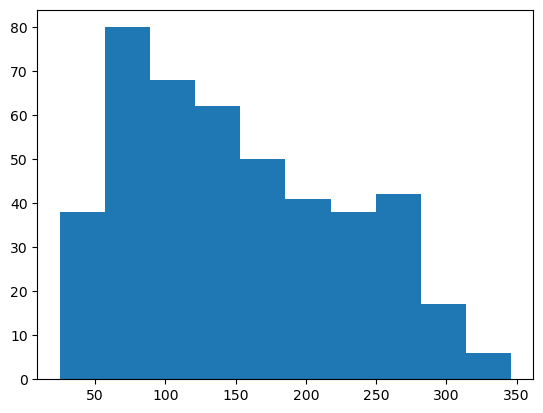

In [116]:
plt.hist(y);

In [25]:
pd.Series(y).describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: target, dtype: float64

In [117]:
coefficients = lasso_clf.best_estimator_.coef_
feature_names = diabetes_df.columns

for name, estimation in zip(feature_names, coefficients):
    print(f'Importancia de {name}: {estimation}')

Importancia de age: 3.0082195463812207
Importancia de sex: -178.12362018613757
Importancia de bmi: 554.7526004950777
Importancia de bp: 316.4146752335019
Importancia de s1: -120.50932278380658
Importancia de s2: -0.0
Importancia de s3: -230.35388818507897
Importancia de s4: 11.536795221550074
Importancia de s5: 467.14486938147144
Importancia de s6: 40.51832952929017


<h2> Comparación entre modelos de regresión lineal </h2>

| Característica        | Regresión Lineal   | LASSO           | Regresión Ridge|
|-----------------------|--------------------|-----------------|-------------------|
| Objetivo              | Minimizar la suma de los residuos al cuadrado (RSS) | Minimizar el RSS con una penalización en el tamaño absoluto de los coeficientes | Minimizar el RSS con una penalización en el tamaño al cuadrado de los coeficientes |
| Término de Penalización | Ninguno            |  $ \sum_{j=1}^{p} |\beta_j| < \alpha$ | $ \sum_{j=1}^{p} \beta_j^2 < \alpha$ |
| Efecto de Reducción   | Ninguno            | Reduce los coeficientes hacia cero, realizando efectivamente la selección de variables | Reduce los coeficientes hacia cero, pero conserva todas las variables |
| Selección de Variables | No                | Sí              | No                |
| Reducción de Coeficientes | No             | Sí              | Sí                |
| Estabilidad de la Solución | Sensible a la multicolinealidad y valores atípicos | Más robusto a la multicolinealidad y valores atípicos en comparación con Ridge, pero aún sensible | Más robusto a la multicolinealidad, pero menos robusto a valores atípicos en comparación con LASSO |
| Interpretabilidad     | Fácil de interpretar coeficientes | Algunos coeficientes pueden establecerse en cero, lo que conduce a un modelo más interpretable | Los coeficientes tienden a ser más pequeños, potencialmente más difíciles de interpretar |
| Complejidad Computacional | Baja            | Mayor que la Regresión Lineal debido al término de penalización adicional | Mayor que la Regresión Lineal debido al término de penalización adicional |
| Validación Cruzada    | Menos intensiva computacionalmente | Más intensiva computacionalmente debido a la selección de parámetros de ajuste | Más intensiva computacionalmente debido a la selección de parámetros de ajuste |
| Adecuado para         | Cuando no hay preocupaciones de multicolinealidad o sobreajuste | Cuando la selección de características es importante y hay multicolinealidad | Cuando la multicolinealidad es una preocupación, pero la selección de características no es necesaria |
